# Titreringssimulator

Dette programmet simulerer en titrerkurve av en svak én-protonisk syre som titreres med sterk base. Programmet er delt inn in flere deler. Du skal:
    - fylle inn data fra lab-øvelsen i lister
    - skrive en funksjon som regner ut og returnerer pH-verdi 
    - kalle på funksjonen og lage et array med utregnet pH 
    - plotte både utregnet og observert pH mot tilsatt base i samme plot
    
    
Du bør følge rekkefølgen slik programmet er skrevet for å unngå feilmeldinger. 


Noen steder er det lagt inn ferdig kode for test-funksjoner. Disse skal hverken kan eller skal endres på, men kjøres når du er ferdig med å fylle inn koden i feltet over. Test-funksjonen vil gi deg tilbakemelding på eventuelle feil i koden du har skrevet. At test-funksjonen ikke slår ut (altså at den kjører stille) er ikke en garanti for at du har skrevet alt riktig, men den vil plukke opp og gi feilmelding på noen typiske feil.

Fyll inn observert pH fra lab i pH_obs.

Fyll inn volumet tilsatt base ved tidspunkt for avlesning av pH.

In [6]:
pH_obs = []

V_when_obs = []

In [5]:
def test_lists():
    success = len(pH_obs) == len(V_when_obs)
    message = 'lengdene paa de to listene maa vaere lik!'
    assert success, message
test_lists()

Variabelnavnene V (volum), c (konsentrasjon) og n (antall mol) vil gjelde for a (syren) eller b (basen). pKa er for den svake syren.


I dette programmet skal du fylle inn likninger for å regne ut pH.
    - første tilfelle: det forekommer ren syre i løsningen. Formel for å regne ut pH for svak syre er brukt.
    - andre tilfelle: mengde base er mindre enn mengde syre. Bufferligningen tas i bruk.
    - tredje tilfelle: mengde base er lik mengde syre. Utregning av pH ved ekvivalenspunkt.
    - fjerde tilfelle: mengde base er større enn mengde syre. Tilsatt base etter ekvivalenspunkt gir pH for sterk base i vann.
    

HINT: numpy har en funksjon som heter log10

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_pH(Vb, Va, cb, ca, pKa):
    na = ca*Va
    nb = cb*Vb
    Kb = 1e-14/10**pKa
    
    if nb == 0:
        pH = 0.5*(pKa - np.log10(ca))
    elif 0 < nb < na:
        pH = pKa + 0.5*np.log10( nb/(na - nb) )
    elif abs(na - nb) < 1e-10:
        pH = 14 + 0.5*np.log10( Kb*ca*cb/(ca + cb))
    else:
        pH = 14 + np.log10((nb - na)/(Va + Vb))
    return pH

In [9]:
def test_calculate_pH():
    pKa = 4.75
    ca = 0.15
    cb = 0.15
    Va = 0.1
    
    Vb = [0, 0.05, 0.1, 0.12]
    pH_expected = [2.78695437047, 4.75, 4.0625306317, 12.1346985739]
    partOf = ['nb = 0', '0 < nb < na', 'nb == na', 'nb > na']
    
    tol = 1e-9
    for i in range(4):
        pH_calc = calculate_pH(Vb[i], Va, cb, ca, pKa)
        success = abs(pH_expected[i] - pH_calc) < tol
        message = 'Feil i funskjon naar %s' %partOf[i]
        assert success, message

test_calculate_pH()

Fyll inn dataene for variablene. 

Vb_array inneholder en liste "tilsatt" base. pH for løsning regnes ut for hvert element i arrayet.

In [10]:
pKa = 4.75
ca = 0.15
cb = 0.2
Va = 0.250

maxVolumeBase = 0.300
N = 300
Vb_array = np.linspace(0, maxVolumeBase, N)

pH_calculated = np.zeros(N)

for i in range(N):
    pH_calculated[i] = calculate_pH(Vb_array[i], Va, cb, ca, pKa)

Koden for plottet er nesten ferdig skrevet. Både den utregnede pH-en og den observerte pH-en vil inkluderes i samme plot. Det er viktig å merke seg at observert pH IKKE er tegnet med en linje, men som punkter. Måten dette er blitt kodet, er ved å sette in 'o' bak punkt-listene til aksene. (plt.plot(x-akse, y-akse, 'o')) Du kan selvfølgelig legge til mer informasjon til plottet om du skulle ønske dette. Det eneste du trenger å gjøre er å fylle inn den manglende informasjonen. 

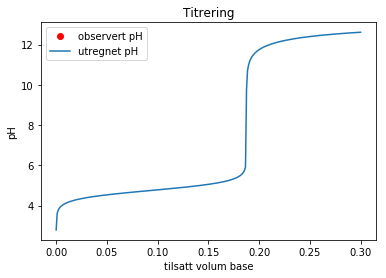

In [11]:
plt.plot(V_when_obs, pH_obs, 'ro', label='observert pH')
plt.plot(Vb_array, pH_calculated, label='utregnet pH')
plt.xlabel('tilsatt volum base')
plt.ylabel('pH')
plt.legend()
plt.title('Titrering')
plt.show()